In [1]:
import pandas as pd
%load_ext rpy2.ipython
%load_ext autoreload
%matplotlib inline
topN =20# the number of top tuples to plot 

In [2]:
dfTest = pd.read_csv('data/test.csv', index_col=False, header=0)
dfTrain = pd.read_csv('data/train.csv', index_col=False, header=0)
dfBids = pd.read_csv('data/bids.csv', index_col=False, header=0)


In [3]:
def TopNRoHu(df,topN,key):
    '''Get top N tuples of human and robot based on key
    '''
    df0=df[df['outcome']==0].sort([key],ascending=0).reset_index()
    df1=df[df['outcome']==1].sort([key],ascending=0).reset_index()
    top0 = df0[:topN]
    top1 = df1[:topN]
    
    return pd.concat([top0,top1]).reset_index()
    

In [4]:
df_outcome=dfTrain[['bidder_id','outcome']]


###Average Number of Bids placed per Auction 

In [80]:
#get avg 
df_auction_bid = dfBids.groupby(['bidder_id','auction']).count().reset_index()[['bidder_id','auction','bid_id']]
df_avg_auction_per_bidder = df_auction_bid.groupby(['bidder_id']).mean().reset_index().rename(columns={'bid_id':'avg_bid_num'})

#get outcome 
df_avg_auction_per_bidder = pd.merge(df_avg_auction_per_bidder,dfTrain,on='bidder_id')
df_avg_auction_per_bidder = df_avg_auction_per_bidder[['bidder_id','avg_bid_num','outcome']]

In [81]:
#get top 20
df_avg_auction_per_bidder = df_avg_auction_per_bidder.sort(['avg_bid_num'],ascending=0)
df_avg_auction_per_human = df_avg_auction_per_bidder[df_avg_auction_per_bidder['outcome']==0].reset_index()
df_avg_auction_per_robot = df_avg_auction_per_bidder[df_avg_auction_per_bidder['outcome']==1].reset_index()
top_avg_auction_per_human = df_avg_auction_per_human[0:topN]
top_avg_auction_per_robot = df_avg_auction_per_robot[0:topN]
top_avg_auction_per_bidder = pd.concat([top_avg_auction_per_human,top_avg_auction_per_robot])
top_avg_auction_per_bidder = top_avg_auction_per_bidder.reset_index()
#top_avg_auction_per_bidder

,level_0,index,bidder_id,avg_bid_num,outcome
0,0,1139,916d2d806b772c9f227a9b3640e31469ljrxo,1023.500000,0
1,1,1909,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,410.058121,0
2,2,1296,a58ace8b671a7531c88814bc86b2a34cf0crb,257.439840,0
3,3,193,197e90906939267ace2422e78e8e83889znqp,205.755440,0
4,4,764,631f923b7bcf91f61a2e9f96520bd8c8vtl14,201.083333,0
5,5,1140,9196288f121946095e5c402fd326109827t0a,198.800000,0
6,6,1194,97f541ffdcbd1ee34610e3099c5df42acfvcd,176.555556,0
7,7,1099,8c09f4afd78059d9200cddc435f5c48ceph11,132.636364,0
8,8,950,78830493a121b8b6917d246ec73ccb4anwocl,129.538462,0
9,9,929,76218e14c379c12d599dae9e1c00b61a3i5b2,124.220745,0


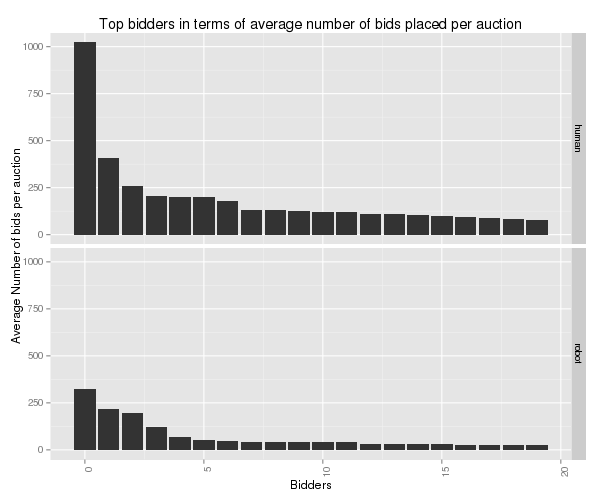

In [116]:
%%R -w 600 -h 500 -i top_avg_auction_per_bidder -u px
library("ggplot2")
df <- as.data.frame(top_avg_auction_per_bidder)
df$outcome <- factor(df$outcome)
levels(df$outcome) <- c('human','robot')
p = ggplot(data=df) 
p = p + geom_bar(aes(x=level_0,y=avg_bid_num),stat='identity')
p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p = p + facet_grid( outcome ~. )
p = p + xlab("Bidders")
p = p + ylab("Average Number of bids per auction") 
p = p + ggtitle('Top bidders in terms of average number of bids placed per auction')

ggsave(filename="AverageBidNum.pdf")
print(p)

###Total Number of Bids Placed

In [84]:
result = pd.merge(dfBids,dfTrain,on='bidder_id')
result1= result[result['outcome']==1].reset_index()
result0= result[result['outcome']==0].reset_index()

In [94]:
topbidders1=result1.groupby(['bidder_id']).count().sort(['outcome'],ascending=False).reset_index()
topbidders1=topbidders1.iloc[0:topN,]
topbidders1['outcome']=1
topbidders0=result0.groupby(['bidder_id']).count().sort(['outcome'],ascending=False).reset_index()
topbidders0=topbidders0.iloc[0:topN,]
topbidders0['outcome']=0

In [112]:
topbidders=pd.concat([topbidders0,topbidders1]).reset_index()

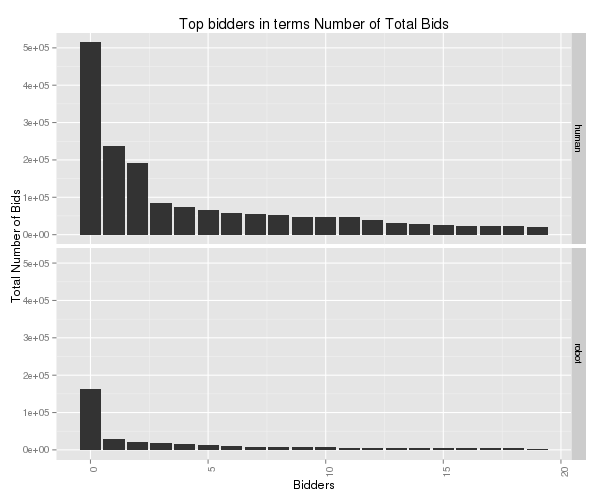

In [115]:
%%R -w 600 -h 500 -i topbidders -u px 
df <- as.data.frame(topbidders)
library("ggplot2")
df$outcome <- factor(df$outcome)
levels(df$outcome) <- c('human','robot')
p = ggplot(data=df) 
p = p + geom_bar(aes(x=level_0,y=bid_id),stat='identity')
p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p = p + facet_grid( outcome ~. )
p = p + xlab("Bidders")
p = p + ylab("Total Number of Bids") 
p = p + ggtitle('Top bidders in terms Number of Total Bids')

ggsave(filename="TopBidders.pdf")
print(p)

###Number of country per bidder

In [34]:
df_country_bidder = dfBids[['bidder_id','country','bid_id']].groupby(['bidder_id','country']).count().reset_index()
df_country_bidder = df_country_bidder.groupby(['bidder_id']).count().reset_index()
df_country_bidder = pd.merge(df_country_bidder,df_outcome, on='bidder_id')
#df_country_bidder


In [30]:
top_num_country = TopNRoHu(df_country_bidder,20,'country')

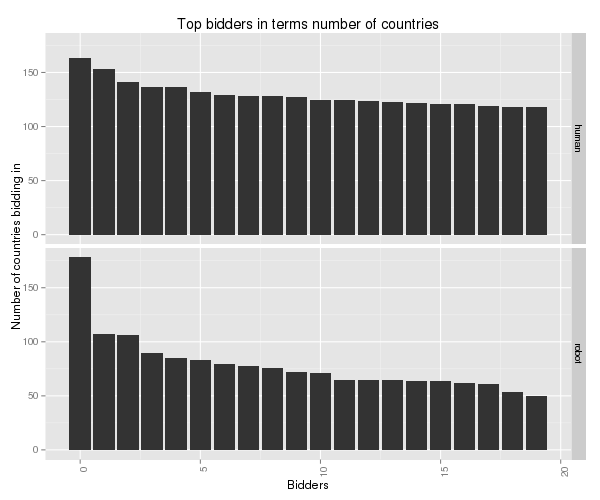

In [33]:
%%R -w 600 -h 500 -i top_num_country -u px
library("ggplot2")
df <- as.data.frame(top_num_country)
df$outcome <- factor(df$outcome)
levels(df$outcome) <- c('human','robot')
p = ggplot(data=df) 
p = p + geom_bar(aes(x=level_0,y=country),stat='identity')
p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p = p + facet_grid( outcome ~. )
p = p + xlab("Bidders")
p = p + ylab("Number of countries bidding in") 
p = p + ggtitle('Top bidders in terms number of countries')

ggsave(filename="NumofCountry.pdf")
print(p)

###Number of IP per Auction 

In [35]:
df_ip_bidder = dfBids[['bidder_id','ip','bid_id']].groupby(['bidder_id','ip']).count().reset_index()
df_ip_bidder = df_ip_bidder.groupby(['bidder_id']).count().reset_index()
df_ip_bidder = pd.merge(df_ip_bidder,df_outcome, on='bidder_id')
df_ip_bidder


,bidder_id,ip,bid_id,outcome
0,001068c415025a009fee375a12cff4fcnht8y,1,1,0
1,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,0
2,00a0517965f18610417ee784a05f494d4dw6e,103,103,0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,0
4,01067975436d123f717ee5aba0dd4bbfa0937,398,398,0
5,012441119bcf83b23d4768bb72cea6d6carua,19,19,0
6,01255c2c7c5578c186873422fc00fd7afwk8k,55,55,0
7,01349288df20199905e719f0ff7ee771nwryj,49,49,0
8,0141844fc725a85e38e12cc02fcdbbe8ofqxv,16,16,0
9,0181b91f58e6cbaa832235e2879c9c00ovrzi,14,14,0


In [42]:
top_num_ip = TopNRoHu(df_ip_bidder,20,'ip')

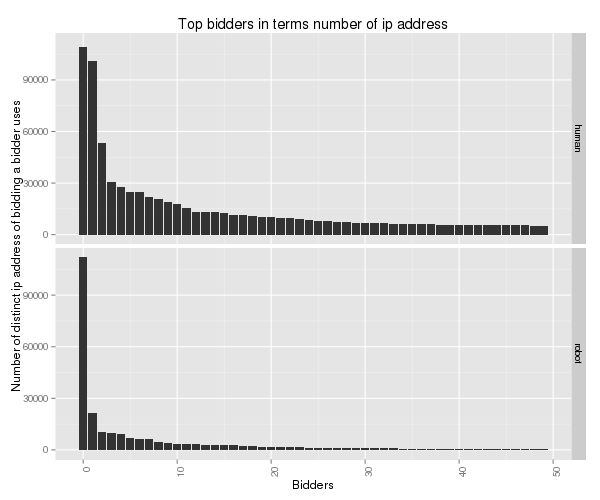

In [41]:
%%R -w 600 -h 500 -i top_num_ip -u px
library("ggplot2")
df <- as.data.frame(top_num_ip)
df$outcome <- factor(df$outcome)
levels(df$outcome) <- c('human','robot')
p = ggplot(data=df) 
p = p + geom_bar(aes(x=level_0,y=ip),stat='identity')
p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p = p + facet_grid( outcome ~. )
p = p + xlab("Bidders")
p = p + ylab("Number of distinct ip address of bidding a bidder uses") 
p = p + ggtitle('Top bidders in terms number of ip address')

ggsave(filename="NumofIp.pdf")
print(p)

###Number of Devices

In [50]:
df_dev_bidder = dfBids[['bidder_id','device','bid_id']].groupby(['bidder_id','device']).count().reset_index()
df_dev_bidder = df_dev_bidder.groupby(['bidder_id']).count().reset_index()
df_dev_bidder = pd.merge(df_dev_bidder,df_outcome, on='bidder_id')
df_dev_bidder
top_num_dev = TopNRoHu(df_dev_bidder,20,'device')

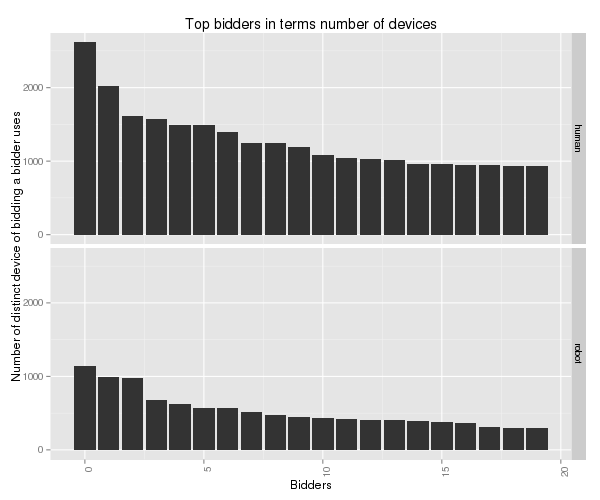

In [51]:
%%R -w 600 -h 500 -i top_num_dev -u px
library("ggplot2")
df <- as.data.frame(top_num_dev)
df$outcome <- factor(df$outcome)
levels(df$outcome) <- c('human','robot')
p = ggplot(data=df) 
p = p + geom_bar(aes(x=level_0,y=device),stat='identity')
p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
p = p + facet_grid( outcome ~. )
p = p + xlab("Bidders")
p = p + ylab("Number of distinct device of bidding a bidder uses") 
p = p + ggtitle('Top bidders in terms number of devices')

ggsave(filename="Numofdev.pdf")
print(p)

###country of bots

In [90]:
country_bot = pd.merge(dfBids[['bidder_id','country']],df_outcome,on='bidder_id')
country_bot0 = country_bot[country_bot['outcome']==0]
country_bot1 = country_bot[country_bot['outcome']==1] 

country_bot0 = country_bot0.groupby(['country']).count().rename(columns={'bidder_id':'b0','outcome':'o0'})
country_bot1 = country_bot1.groupby(['country']).count().rename(columns={'bidder_id':'b1','outcome':'o1'})

country_bot = pd.concat([country_bot0,country_bot1],axis=1).reset_index()
country_bot['percentage'] = country_bot['b1']/(country_bot['b0']+country_bot['b1'])
country_bot = country_bot.sort(['percentage'],ascending=0)[:topN]
country_bot
x_order= list(country_bot['index'])
#x_order

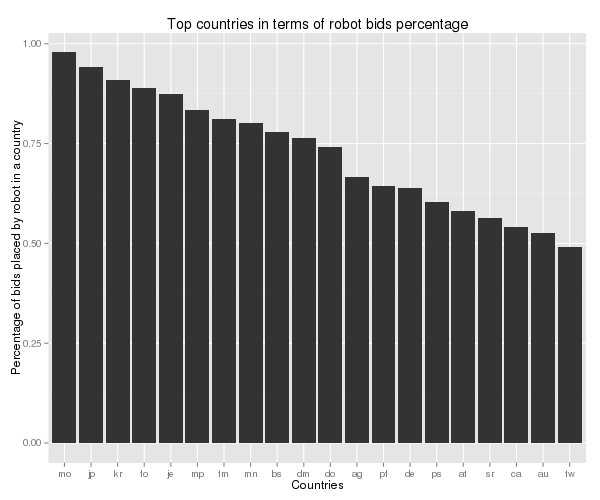

In [89]:
%%R -w 600 -h 500 -i country_bot,x_order -u px
library("ggplot2")
df <- as.data.frame(country_bot)
df$index <- factor(df$index,levels=x_order)
p = ggplot(data=df) 
p = p + geom_bar(aes(x=index,y=percentage),stat='identity')
#p = p + theme(axis.text.x = element_text(angle = 90, hjust = 1))
#p = p + facet_grid( outcome ~. )
p = p + xlab("Countries")
p = p + ylab("Percentage of bids placed by robot in a country") 
p = p + ggtitle('Top countries in terms of robot bids percentage')

ggsave(filename="countryBotPercent.pdf")
print(p)